<h1> Act 3. Series de tiempo

<h4> TC3007C.502 | Inteligencia artificial avanzada para la ciencia de datos II

<h4> 17 de noviembre de 2023

A01633784 | Alejandro Pizarro Chavez

A01634154 | Diego Rosas

a01634615 | Héctor Manuel Cárdenas Yáñez

A01639224 | Fausto Alejandro Palma Cervantes

A01640260 | Alan Ricardo Vilchis Arceo

### Configuración del entorno de trabajo

In [1]:
# Importar librerías y módulos necesarios
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from statsmodels.tsa.arima.model import ARIMA

### Realizar un analisis de series de tiempo para el dataset de Dow Jones

In [2]:
# Importar el dataset de Dow Jones y almacenar como un DataFrame
df = pd.read_csv('/content/drive/MyDrive/zEstadística/dow+jones+index/dow_jones_index.data')

# Seleccionar las características mostradas en la presentación
df = df.loc[:,['date', 'high', 'low', 'volume', 'percent_change_price']]

df

,date,high,low,volume,percent_change_price
0,1/7/2011,$16.72,$15.78,239655616,3.79267
1,1/14/2011,$16.71,$15.64,242963398,-4.42849
2,1/21/2011,$16.38,$15.60,138428495,-2.47066
3,1/28/2011,$16.63,$15.82,151379173,1.63831
4,2/4/2011,$17.39,$16.18,154387761,5.93325
...,...,...,...,...,...
745,5/27/2011,$82.63,$80.07,68230855,3.00424
746,6/3/2011,$83.75,$80.18,78616295,-2.52161
747,6/10/2011,$81.87,$79.72,92380844,-1.42098
748,6/17/2011,$80.82,$78.33,100521400,-1.22500


### 1. Proceda con la exploracion inicial de los datos y realize las transformaciones habituales y necesarias para las siguientes situaciones presentes en los datos:

*   Valores string con símbolos o delimitadores.
*   Múltiples muestras en mismas fechas.
*   Formatos adecuados de fechas (datetime).
*   Orden ascendente / descendente por fechas.

In [3]:
# Convertir los valores string con símbolos y delimitadores a numéricos
df['high'] = pd.to_numeric(df['high'].str.replace(r'$', '', regex=True))
df['low'] = pd.to_numeric(df['low'].str.replace(r'$', '', regex=True))

# Encontrar la media de las múltimples muestras en la misma fecha
df = df.groupby('date').mean()

# Convertir la fecha al formato adecuado
df.index = pd.to_datetime(df.index)
ds = df.index.to_series()
df['month'] = ds.dt.month
df['day_of_week'] = ds.dt.dayofweek
df['day'] = ds.dt.day

# # Ordenar ascendente por fecha
df = df.sort_values(by='date', ascending=True)

df

,high,low,volume,percent_change_price,month,day_of_week,day
date,,,,,,,
2011-01-07,52.394333,50.535000,1.641992e+08,0.533190,1,4,7
2011-01-14,52.315333,50.572000,1.090246e+08,1.322282,1,4,14
2011-01-21,52.934333,51.229333,1.223585e+08,0.156960,1,4,21
2011-01-28,53.713667,51.400333,1.507353e+08,-0.597219,1,4,28
2011-02-04,53.592333,51.746333,1.199585e+08,2.099038,2,4,4
2011-02-11,54.679333,52.763000,1.371438e+08,0.922095,2,4,11
2011-02-18,54.773000,53.369667,8.658673e+07,0.994382,2,4,18
2011-02-25,54.817667,52.432667,1.141245e+08,-1.331562,2,4,25
2011-03-04,54.496333,52.576667,1.204931e+08,-0.174938,3,4,4


### 2. Realice los procesos para la verificacion de la propiedad de estacionariedad (Visual, Dickey-Fuller)

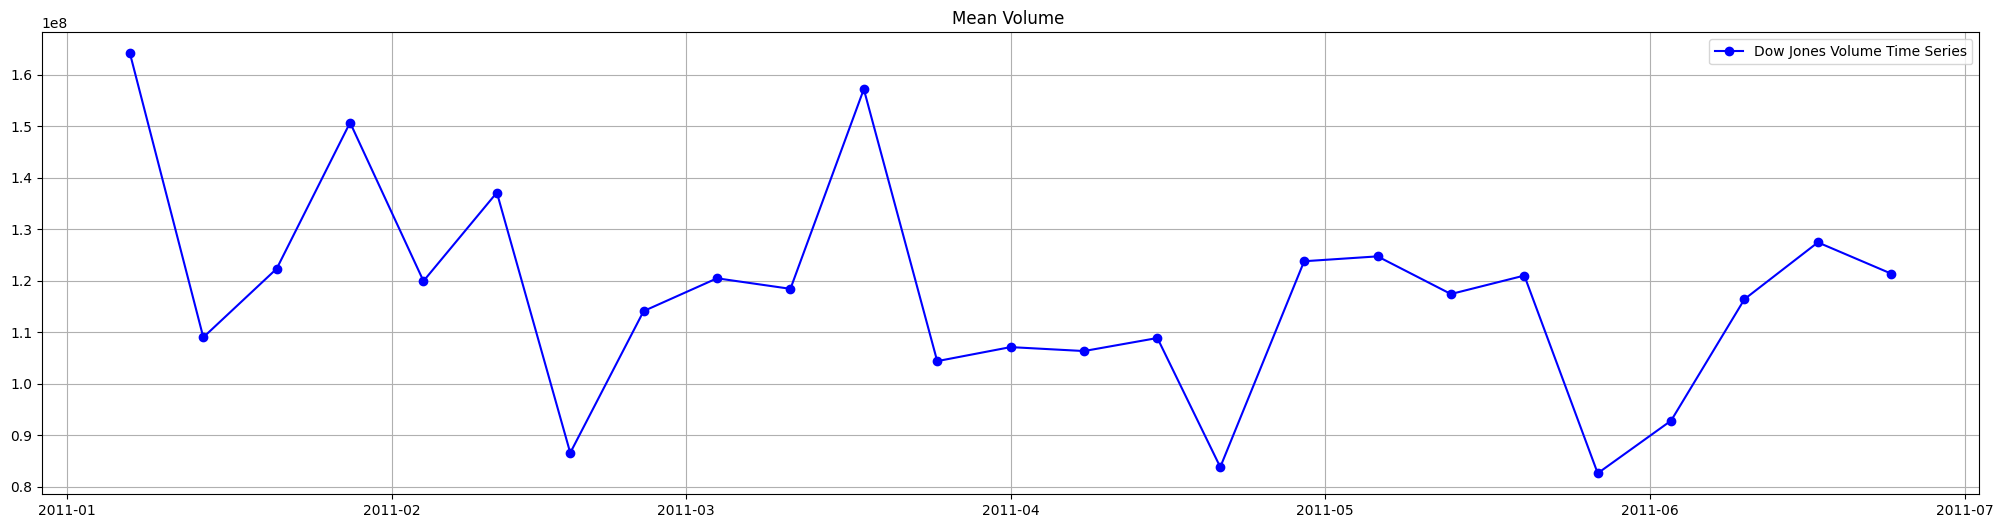

In [4]:
# Verificación visual de la propiedad de estacionariedad
fig = plt.figure(figsize=(25, 6))

fig = plt.plot(df.index, df['volume'], 'bo-', label='Dow Jones Volume Time Series')

plt.title('Mean Volume ')
plt.legend()
plt.grid()

In [5]:
# Verificación Dickey-Fuller de la propiedad de estacionariedad
adf = adfuller(df['volume'], maxlag = 1)

print('T-test (Test Statistic): ', adf[0], '\n')
print('P-value: ', adf[1], '\n')
print('Valores críticos (Critical Value): ', adf[4])

T-test (Test Statistic):  -5.26849555635069 

P-value:  6.361332458733481e-06 

Valores críticos (Critical Value):  {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}


### 3. Utiliza el modelo de regresion de Poisson en un conjunto de datos de entrenamiento. Posteriormente, haga una predicción con los datos de prueba, imprima el resumen del modelo, error (MSE) y la grafica.

*   Despues de realizar el preprocesamiento de los datos, analisis de estacionariedad y el resumen del modelo ¿Qué información/caracteristicas puede decir de los datos originales?
*   ¿Qué pase si se intenta una operación de extrapolación (Forecasting) de los datos con el modelo?

In [6]:
# Crear conjuntos de entrenamiento y de prueba
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

print('Training data set length: ', len(df_train))
print('Testing data set length: ', len(df_test))

Training data set length:  19
Testing data set length:  6


In [7]:
# Configurar las matrices de los conjuntos de prueba y de entrenamiento
expr = 'volume ~ day + day_of_week + month + high + low + percent_change_price'

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

display(X_train.head())
y_train.head()

,Intercept,day,day_of_week,month,high,low,percent_change_price
date,,,,,,,
2011-01-07,1.0,7.0,4.0,1.0,52.394333,50.535000,0.533190
2011-01-14,1.0,14.0,4.0,1.0,52.315333,50.572000,1.322282
2011-01-28,1.0,28.0,4.0,1.0,53.713667,51.400333,-0.597219
2011-02-04,1.0,4.0,4.0,2.0,53.592333,51.746333,2.099038
2011-02-18,1.0,18.0,4.0,2.0,54.773000,53.369667,0.994382


,volume
date,
2011-01-07,1.641992e+08
2011-01-14,1.090246e+08
2011-01-28,1.507353e+08
2011-02-04,1.199585e+08
2011-02-18,8.658673e+07


In [8]:
# Entrenar el modelo de regresión de Poisson con el conjunto de entrenamiento
poisson_training_results = sm.GLM(y_train, X_train,
                                  family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 volume   No. Observations:                   19
Model:                            GLM   Df Residuals:                       13
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7030e+07
Date:                Sat, 18 Nov 2023   Deviance:                   3.4059e+07
Time:                        03:45:34   Pearson chi2:                 3.37e+07
No. Iterations:                    29   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.2447 

In [9]:
# Predicción con los datos de prueba
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()

predictions_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
date,,,,
2011-01-21,1.247355e+08,6561.492051,1.247226e+08,1.247484e+08
2011-02-11,1.187073e+08,4318.583706,1.186989e+08,1.187158e+08
2011-03-11,1.277315e+08,4897.975118,1.277219e+08,1.277411e+08
2011-04-21,8.960360e+05,251.986449,8.955422e+05,8.965300e+05
2011-05-06,1.053918e+08,6794.694179,1.053784e+08,1.054051e+08
2011-05-27,1.019700e+08,7028.625136,1.019563e+08,1.019838e+08


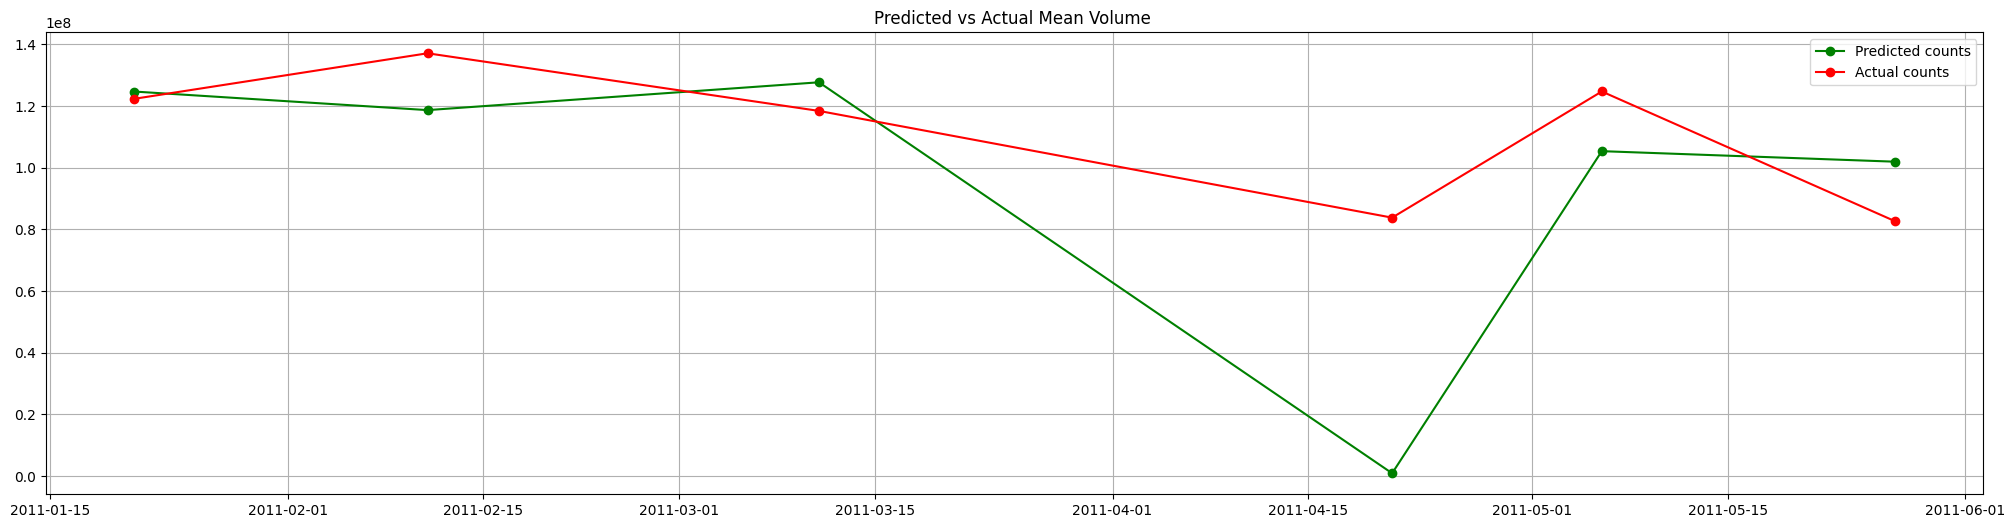

In [10]:
# Predicción del volumen durante el periodo de tiempo
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test['volume']

fig = plt.figure(figsize=(25, 6))

predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')

plt.title('Predicted vs Actual Mean Volume ')
plt.legend()
plt.grid()

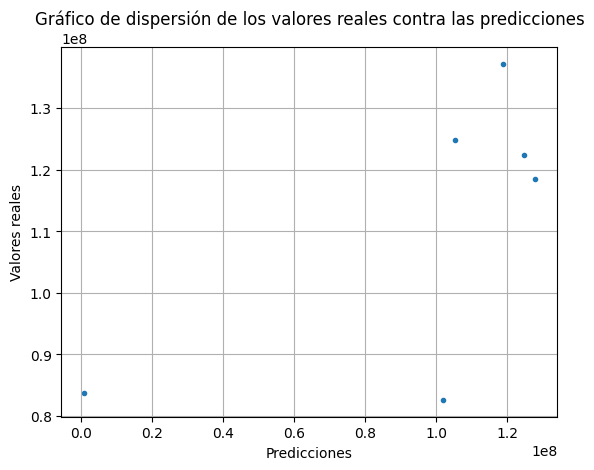

In [11]:
# Gráfico de dispersión de los valores reales contra las predicciones
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')

plt.title('Gráfico de dispersión de los valores reales contra las predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.grid()

*   Despues de realizar el preprocesamiento de los datos, analisis de estacionariedad y el resumen del modelo ¿Qué información/caracteristicas puede decir de los datos originales?

**Después de realizar el preprocesamiento de los datos, análisis de estacionariedad y el resumen del modelo, es posible concluir que se está tratando con una serie temporal estacionaria. Lo anterior se debe a que los resultados de la prueba de Dickey-Fuller muestran que el estadístico de prueba no es mayor que los valores críticos, por lo cual la hipótesis nula (la existencia de una raíz unitaria) puede ser rechazada. La naturaleza de esta serie de tiempo permite hacer predicciones de los datos originales ya que las propiedades estadísticas de este conjunto son constantes a lo largo del tiempo.**

*   ¿Qué pase si se intenta una operación de extrapolación (Forecasting) de los datos con el modelo?

**Cuando se hace una predicción con el modelo es posible observar que la predicción es relativamente cercana a los datos reales, especialmente considerando la magnitud de los datos pertenecientes a esta serie de tiempo. Lo anterior indica que la regresión de Poisson funciona exitosamente para este conjunto de datos.**

### 3. Realice una analisis de autocorrelacion y autocorrelacion parcial

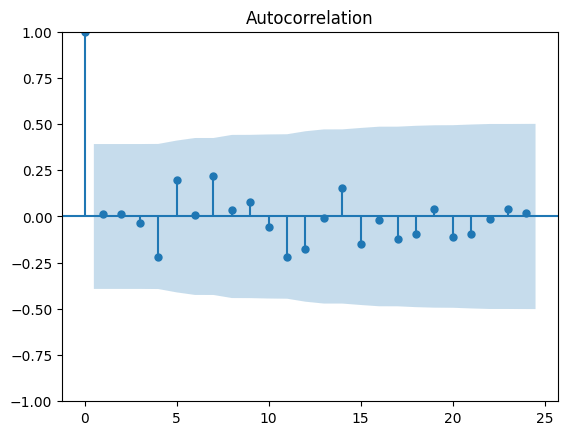

In [12]:
# Mostrar gráficamente la función de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['volume'], lags=len(df['volume'])-1);

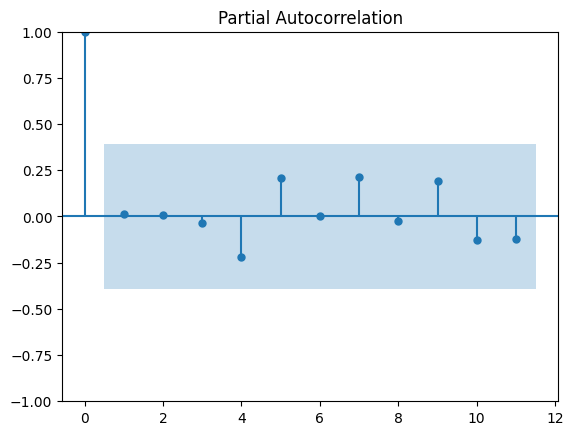

In [13]:
# Mostrar gráficamente la función de autocorrelación parcial
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['volume'], lags=len(df['volume'])/2-1);

### 4. Utiliza el modelo AR en un conjunto de datos de entrenamiento.

*   Haga una predicción a corto-plazo con los datos de prueba, imprima el error (MSE) y la grafica.
*   Haga una predicción continua con los datos de prueba, imprima el error (MSE) y la grafica.
*   Compare el resultado con ambos resultado. (error, desviacion de los datos predichos con el tiempo, etc.)


In [14]:
# Copia de los valores a predecir del conjunto inicial
series = df['volume'].copy()
series

date
2011-01-07    1.641992e+08
2011-01-14    1.090246e+08
2011-01-21    1.223585e+08
2011-01-28    1.507353e+08
2011-02-04    1.199585e+08
2011-02-11    1.371438e+08
2011-02-18    8.658673e+07
2011-02-25    1.141245e+08
2011-03-04    1.204931e+08
2011-03-11    1.184469e+08
2011-03-18    1.572290e+08
2011-03-25    1.044030e+08
2011-04-01    1.071276e+08
2011-04-08    1.063614e+08
2011-04-15    1.088940e+08
2011-04-21    8.382196e+07
2011-04-29    1.238058e+08
2011-05-06    1.247516e+08
2011-05-13    1.174370e+08
2011-05-20    1.210239e+08
2011-05-27    8.262061e+07
2011-06-03    9.284393e+07
2011-06-10    1.164434e+08
2011-06-17    1.274691e+08
2011-06-24    1.213916e+08
Name: volume, dtype: float64

In [15]:
# Dividir los datos en conjuntos de prueba y entrenamiento
X = series.values

size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
ind_train, ind_test = df.index[0:size], df.index[size:len(X)]

print('Test size: ', len(test))

Test size:  5


In [16]:
# Crear y entrenar un modelo con el conjunto de entrenamiento
model = AutoReg(train, lags=len(train)/2-1)
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)

Coefficients: [ 4.22745369e+07 -2.74424454e-01 -2.00913418e-01  5.23069531e-03
 -3.75467243e-01  3.21759192e-02  1.86247836e-01  4.68202870e-01
  2.77317085e-01  4.19527188e-01]


In [17]:
# Utilizar el modelo para hacer predicciones
st_predictions = model_fit.predict(start=len(train),
                                end=len(train)+len(test)-1,
                                dynamic=False)

for i in range(len(st_predictions)):
  print('predicted=%f, expected=%f' % (st_predictions[i], test[i]))

predicted=85920681.029520, expected=82620614.933333
predicted=93173088.398508, expected=92843928.300000
predicted=97120151.118412, expected=116443430.933333
predicted=105820450.914667, expected=127469133.966667
predicted=115623599.524786, expected=121391559.133333


In [18]:
# Error cuadrático de la predicción
st_mse = mean_squared_error(test, st_predictions)
print('Short-Term Test MSE: %.3f' % st_mse)
print('Short-Term Test RMSE: %.3f' % sqrt(st_mse))

Short-Term Test MSE: 177264552269430.625
Short-Term Test RMSE: 13314073.466


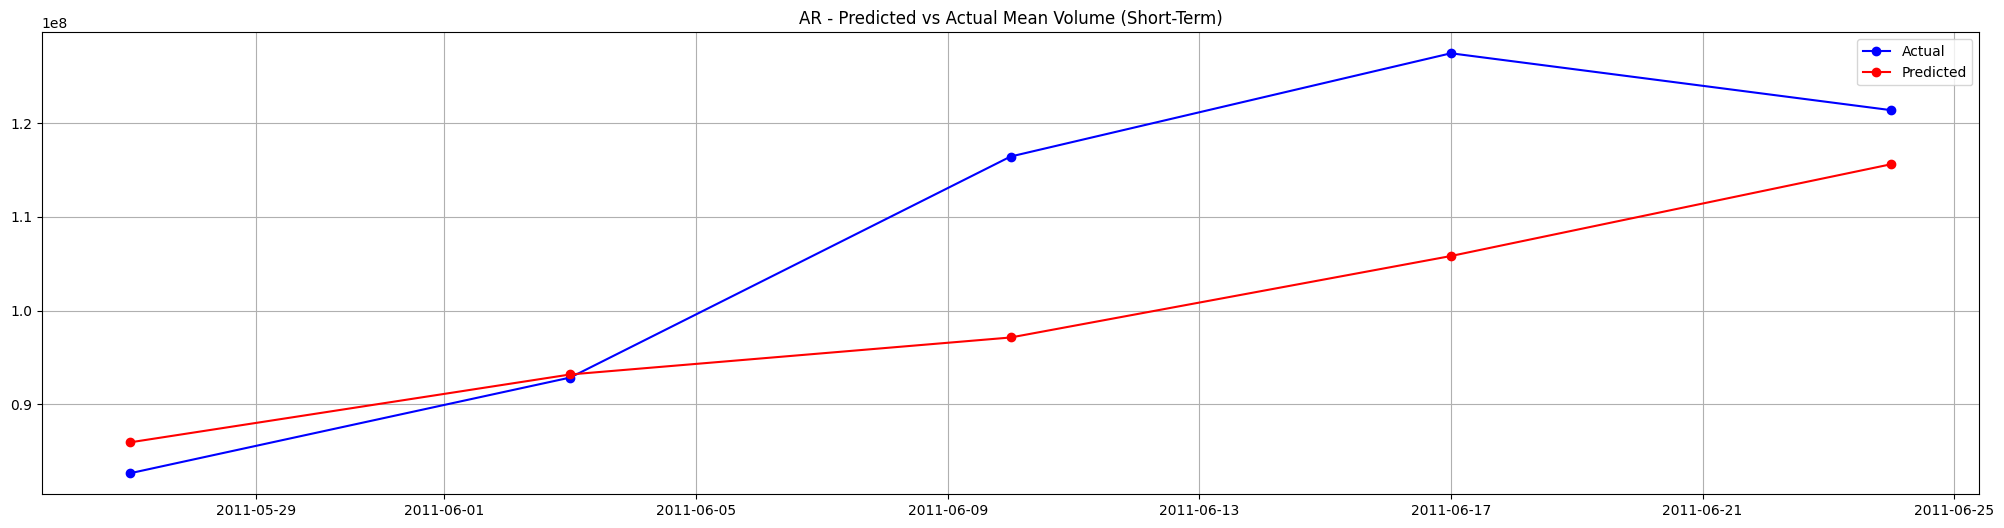

In [19]:
# Predicción del volumen con un modelo de AutoRegresion
fig = plt.figure(figsize=(25, 6))

actual, = plt.plot(ind_test, test, 'bo-', label='Actual')
predicted, = plt.plot(ind_test, st_predictions, 'ro-', label='Predicted')

plt.title('AR - Predicted vs Actual Mean Volume (Short-Term)')
plt.legend()
plt.grid()

In [20]:
# Crear,entrenar y predecir con un modelo entrenado con el conjunto de datos
train_history = list(train)
c_predictions = list()

for t in range(len(test)):
  model = AutoReg(train_history, lags=9)
  model_fit = model.fit()

  y_hat = model_fit.forecast()[0]
  c_predictions.append(y_hat)

  y_real = test[t]
  train_history.append(y_real)

  print('predicted=%f, expected=%f' % (y_hat, y_real))

predicted=85920681.029520, expected=82620614.933333
predicted=93036174.493610, expected=92843928.300000
predicted=97338850.536288, expected=116443430.933333
predicted=102957937.361307, expected=127469133.966667
predicted=114757925.101635, expected=121391559.133333


In [21]:
# Error cuadrático de la predicción
c_mse = mean_squared_error(test, c_predictions)
print('Short-Term Test MSE: %.3f' % c_mse)
print('Short-Term Test RMSE: %.3f' % sqrt(c_mse))

Short-Term Test MSE: 204143249295692.500
Short-Term Test RMSE: 14287870.705


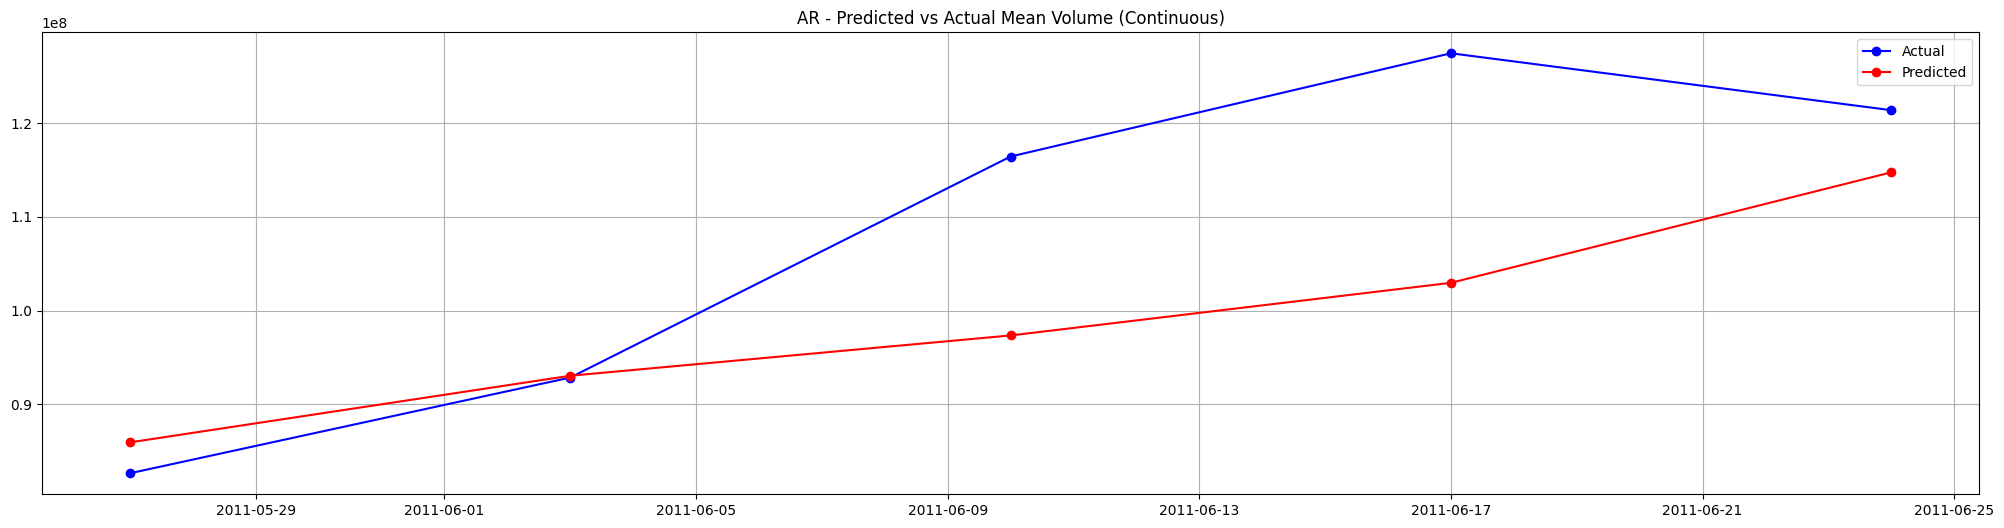

In [22]:
# Predicción del volumen con un modelo de AutoRegresion
fig = plt.figure(figsize=(25, 6))

actual, = plt.plot(ind_test, test, 'bo-', label='Actual')
predicted, = plt.plot(ind_test, c_predictions, 'ro-', label='Predicted')

plt.title('AR - Predicted vs Actual Mean Volume (Continuous)')
plt.legend()
plt.grid()

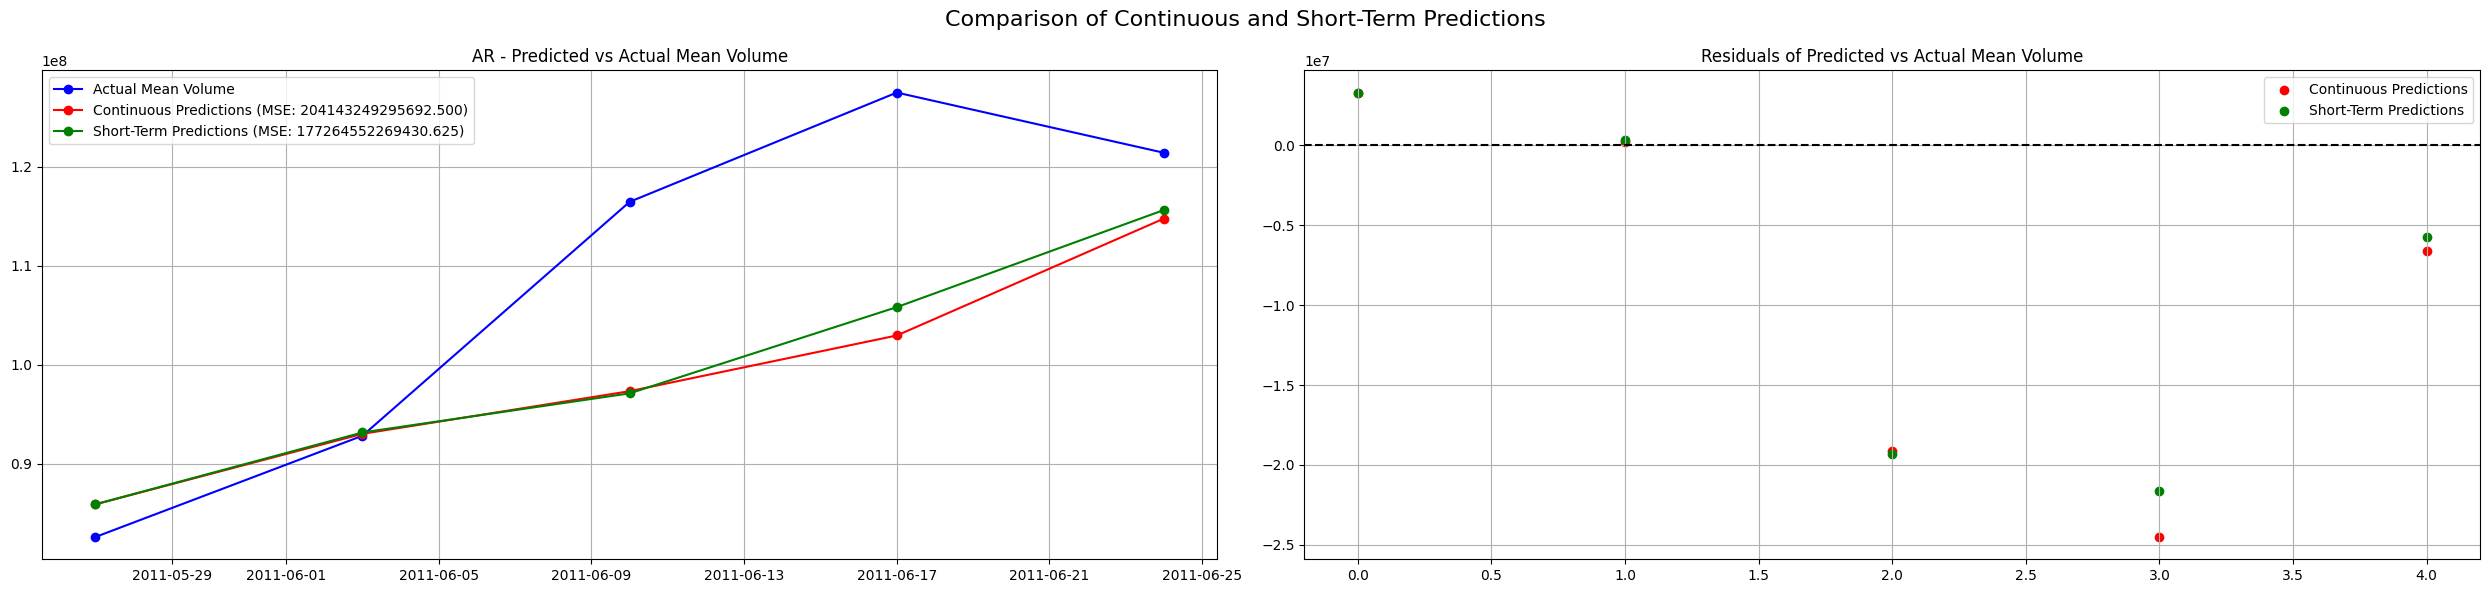

In [23]:
# Comparación entre ambos tipos de resultados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))

axes[0].set_title('AR - Predicted vs Actual Mean Volume')
axes[0].plot(ind_test, test, 'bo-', label='Actual Mean Volume')
axes[0].plot(ind_test, c_predictions, 'ro-', label=('Continuous Predictions (MSE: %.3f)' % c_mse))
axes[0].plot(ind_test, st_predictions, 'go-', label=('Short-Term Predictions (MSE: %.3f)' % st_mse))
axes[0].legend()
axes[0].grid()

axes[1].set_title('Residuals of Predicted vs Actual Mean Volume')
axes[1].scatter(range(len(test)), c_predictions - test, color='r', label='Continuous Predictions')
axes[1].scatter(range(len(test)), st_predictions - test, color='g', label='Short-Term Predictions')
axes[1].axhline(y=0, linestyle='--', color='black')
axes[1].legend()
axes[1].grid()

fig.suptitle('Comparison of Continuous and Short-Term Predictions', fontsize=16)
plt.tight_layout()

### 5. Utiliza el modelo ARIMA en un conjunto de datos de entrenamiento.

*   Haga una predicción continua con los datos de prueba, imprima el error (MSE) y la grafica.
*   Compare los resultado con el modelo AR. (En prediccion continua: error, desviacion de los datos predichos con el tiempo, etc.)
*   ¿En que situaciones cree que seria mejor utilizar un modelo AR o un ARIMA?

In [24]:
# Calculo de las puntuaciones AIC para la selección del orden de desfase
warnings.filterwarnings('ignore')

best_aic = float('inf')
best_order = None
aic_values = []

for p in range(1, len(train)):
  try:
    model = ARIMA(train, order=(p,0,0))
    model_fit = model.fit()
    aic = model_fit.aic
    print(f'AR({p}): AIC = {aic:.2f}')

    if aic < best_aic:
      best_aic = aic
      best_order = (p, 0, 0)

  except Exception as e:
    print(f'Error for AR({p}): {e}')

print(f'\nBest AR order: {best_order} with AIC: {best_aic:.2f}')

AR(1): AIC = 735.44
AR(2): AIC = 737.19
AR(3): AIC = 738.94
AR(4): AIC = 740.49
AR(5): AIC = 742.01
AR(6): AIC = 743.51
AR(7): AIC = 745.91
AR(8): AIC = 747.67
AR(9): AIC = 749.01
AR(10): AIC = 678353092311.80
Error for AR(11): LU decomposition error.
AR(12): AIC = 28.00
AR(13): AIC = 3145527944959.95
AR(14): AIC = 3129390223367.50
AR(15): AIC = 271565989705.75
AR(16): AIC = 53483768971.34
AR(17): AIC = 9365648810.62
AR(18): AIC = 9219858802.98
AR(19): AIC = 765.02

Best AR order: (12, 0, 0) with AIC: 28.00


**<h3> Parámetros para el modelo ARIMA:**

*   **Orden de desface p: 12 (Obtenido con la puntación AIC más baja dado el número limitado de muestras)**
*   **Grado de diferenciación d: 0 (Al ser una serie estacionaria el proceso ARIMA puede convertirse en ARMA [Consulte la prueba de Dickey Fuller])**
*   **Orden de la media móvil q: 0 (Datos no sufren de estacionariedad en varianza [Consultar el gráfico de la función de autocorrelación])**



In [25]:
# Copia de los valores a predecir del conjunto inicial
series = df['volume'].copy()
print(series)

series.index = series.index.to_period('M')
print('\n', series)

date
2011-01-07    1.641992e+08
2011-01-14    1.090246e+08
2011-01-21    1.223585e+08
2011-01-28    1.507353e+08
2011-02-04    1.199585e+08
2011-02-11    1.371438e+08
2011-02-18    8.658673e+07
2011-02-25    1.141245e+08
2011-03-04    1.204931e+08
2011-03-11    1.184469e+08
2011-03-18    1.572290e+08
2011-03-25    1.044030e+08
2011-04-01    1.071276e+08
2011-04-08    1.063614e+08
2011-04-15    1.088940e+08
2011-04-21    8.382196e+07
2011-04-29    1.238058e+08
2011-05-06    1.247516e+08
2011-05-13    1.174370e+08
2011-05-20    1.210239e+08
2011-05-27    8.262061e+07
2011-06-03    9.284393e+07
2011-06-10    1.164434e+08
2011-06-17    1.274691e+08
2011-06-24    1.213916e+08
Name: volume, dtype: float64

 date
2011-01    1.641992e+08
2011-01    1.090246e+08
2011-01    1.223585e+08
2011-01    1.507353e+08
2011-02    1.199585e+08
2011-02    1.371438e+08
2011-02    8.658673e+07
2011-02    1.141245e+08
2011-03    1.204931e+08
2011-03    1.184469e+08
2011-03    1.572290e+08
2011-03    1.044030e

In [26]:
# Crear y entrenar un modelo con el conjunto de entrenamiento
model = ARIMA(series, order=(12, 0, 0))
model_fit = model.fit()

print('Coefficients:\n%s' % model_fit.params)

Coefficients:
const     1.175478e+08
ar.L1    -7.555595e-01
ar.L2    -1.269394e-01
ar.L3     3.332963e-01
ar.L4    -1.416593e-02
ar.L5     4.230164e-01
ar.L6     2.000059e-01
ar.L7     4.125659e-01
ar.L8    -6.258567e-04
ar.L9     3.273143e-01
ar.L10   -1.346657e-01
ar.L11   -8.172679e-01
ar.L12   -9.254953e-01
sigma2    5.030398e+12
dtype: float64


In [27]:
# Imprimir los resultados del modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                   25
Model:                ARIMA(12, 0, 0)   Log Likelihood                -550.861
Date:                Sat, 18 Nov 2023   AIC                           1129.722
Time:                        03:46:34   BIC                           1146.787
Sample:                    01-31-2011   HQIC                          1134.455
                         - 06-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.175e+08    1.1e-08   1.07e+16      0.000    1.18e+08    1.18e+08
ar.L1         -0.7556      0.027    -28.170      0.000      -0.808      -0.703
ar.L2         -0.1269      0.012    -10.529      0.0

<Axes: xlabel='date'>

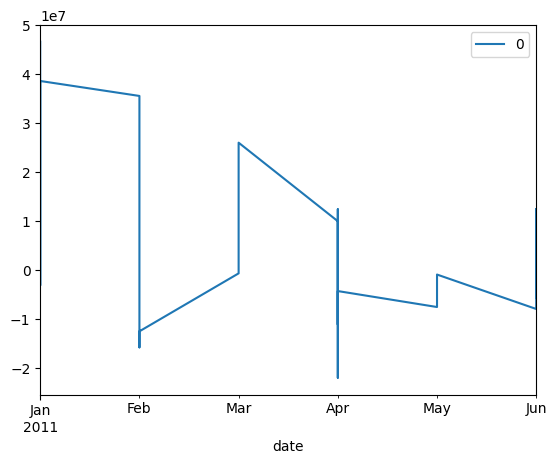

In [28]:
# Gráfico linear de los residuos
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

<Axes: ylabel='Density'>

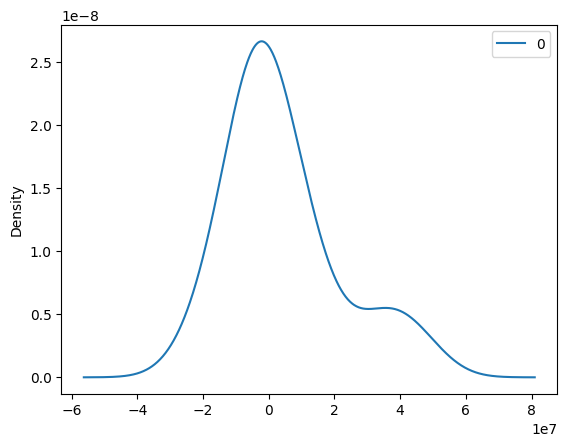

In [29]:
# Gráfico de densidad de los residuos
residuals.plot(kind='kde')

In [30]:
# Resumen de los residuos
print(residuals.describe())

                  0
count  2.500000e+01
mean   4.077200e+06
std    1.701326e+07
min   -2.199292e+07
25%   -5.710998e+06
50%   -9.143547e+05
75%    1.014165e+07
max    4.665143e+07


In [31]:
# Dividir los datos en conjuntos de prueba y entrenamiento
X = series.values

size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

ind_train, ind_test = df.index[0:size], df.index[size:len(X)]

In [32]:
# Crear,entrenar y predecir con un modelo entrenado con el conjunto de datos
history = list(train)
arima_predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(12, 0, 0))
  model_fit = model.fit()

  y_hat = model_fit.forecast()[0]
  arima_predictions.append(y_hat)

  y_real = test[t]
  history.append(y_real)

  print('predicted=%f, expected=%f' % (y_hat, y_real))

predicted=119896318.395000, expected=82620614.933333
predicted=118121284.896825, expected=92843928.300000
predicted=-993488813.189548, expected=116443430.933333
predicted=126212474.643119, expected=127469133.966667
predicted=101155638.551001, expected=121391559.133333


In [33]:
# Error cuadrático de la predicción
arima_mse = mean_squared_error(test, c_predictions)
print('ARIMA Test MSE: %.3f' % arima_mse)
print('ARIMA Test RMSE: %.3f' % sqrt(arima_mse))

ARIMA Test MSE: 204143249295692.500
ARIMA Test RMSE: 14287870.705


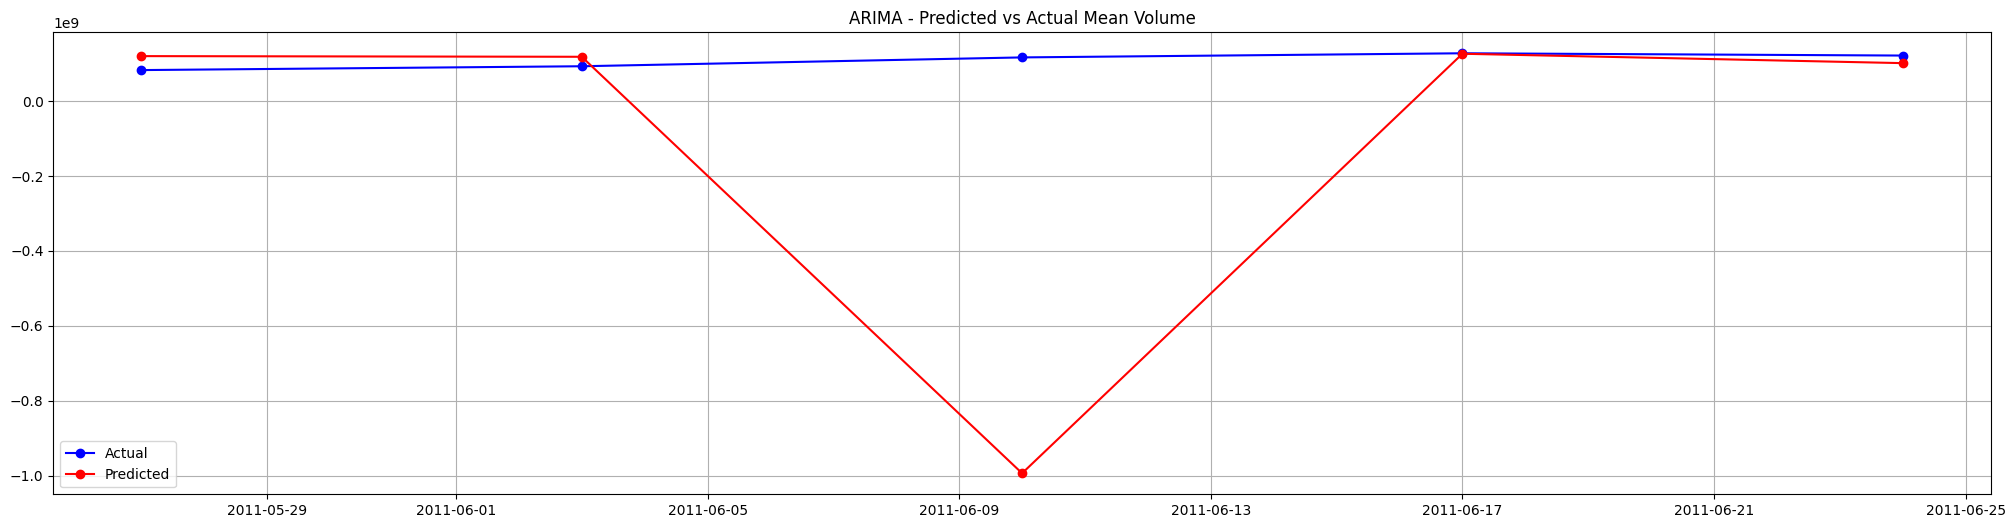

In [34]:
# Predicción del volumen con un modelo ARIMA
fig = plt.figure(figsize=(25, 6))

actual, = plt.plot(ind_test, test, 'bo-', label='Actual')
predicted, = plt.plot(ind_test, arima_predictions, 'ro-', label='Predicted')

plt.title('ARIMA - Predicted vs Actual Mean Volume')
plt.legend()
plt.grid()

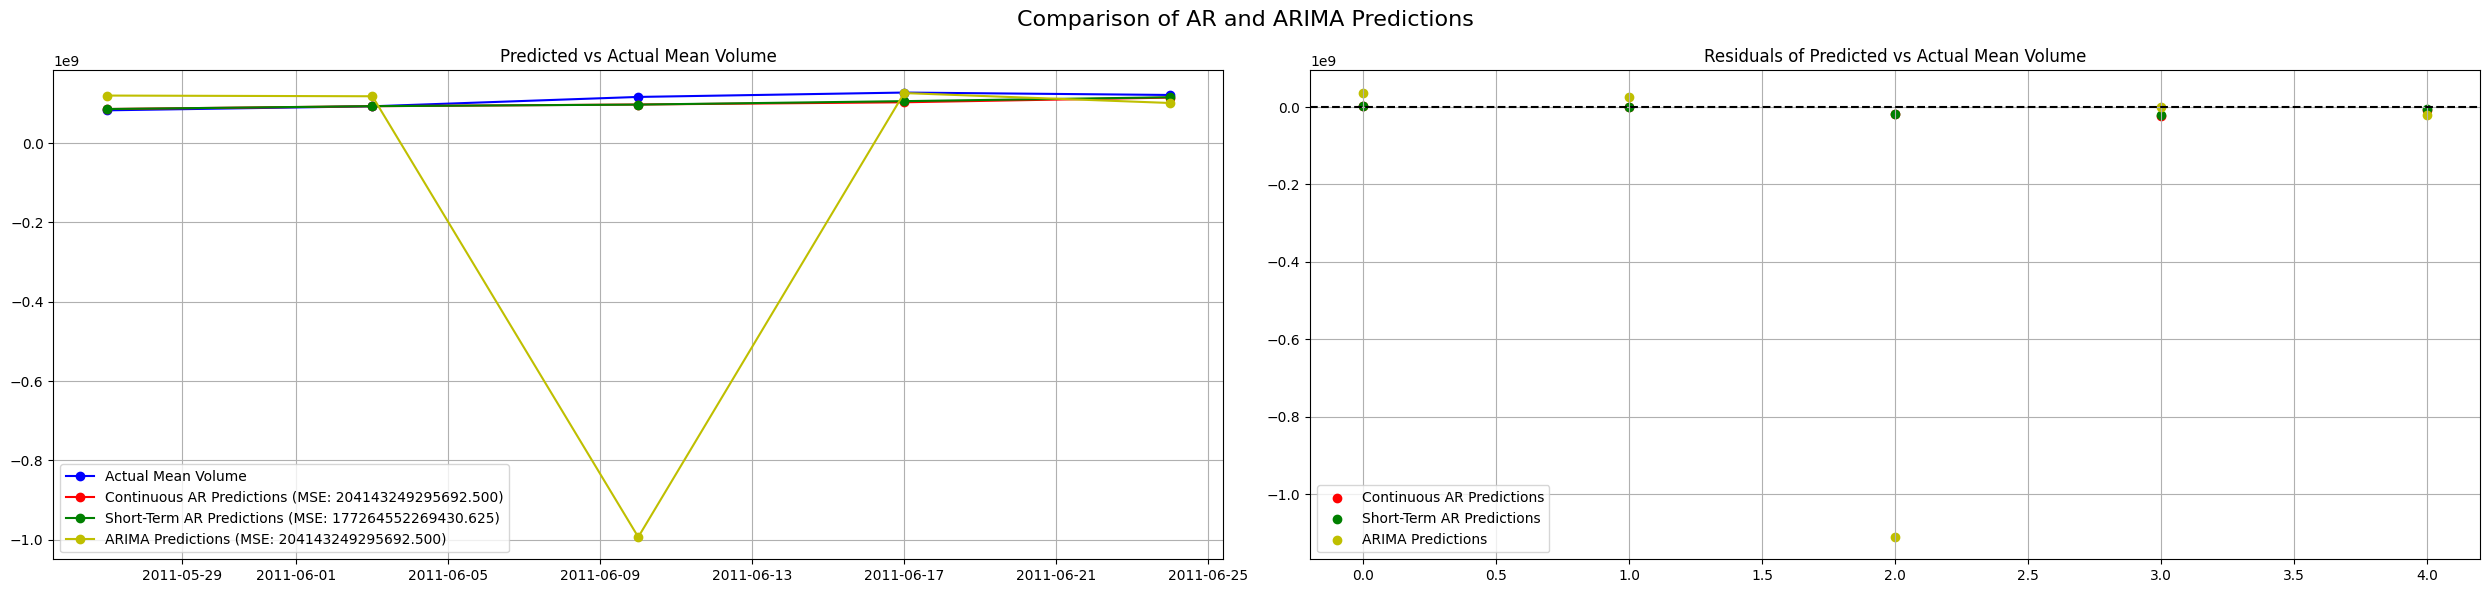

In [35]:
# Comparación entre tipos de modelos y sus resultados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))

axes[0].set_title('Predicted vs Actual Mean Volume')
axes[0].plot(ind_test, test, 'bo-', label='Actual Mean Volume')
axes[0].plot(ind_test, c_predictions, 'ro-', label=('Continuous AR Predictions (MSE: %.3f)' % c_mse))
axes[0].plot(ind_test, st_predictions, 'go-', label=('Short-Term AR Predictions (MSE: %.3f)' % st_mse))
axes[0].plot(ind_test, arima_predictions, 'yo-', label=('ARIMA Predictions (MSE: %.3f)' % arima_mse))
axes[0].legend()
axes[0].grid()

axes[1].set_title('Residuals of Predicted vs Actual Mean Volume')
axes[1].scatter(range(len(test)), c_predictions - test, color='r', label='Continuous AR Predictions')
axes[1].scatter(range(len(test)), st_predictions - test, color='g', label='Short-Term AR Predictions')
axes[1].scatter(range(len(test)), arima_predictions - test, color='y', label='ARIMA Predictions')
axes[1].axhline(y=0, linestyle='--', color='black')
axes[1].legend()
axes[1].grid()

fig.suptitle('Comparison of AR and ARIMA Predictions', fontsize=16)
plt.tight_layout()

*   ¿En que situaciones cree que seria mejor utilizar un modelo AR o un ARIMA?

**De acuerdo a lo mencionado en la presentación, cuando se tiene un conjunto de datos estacionario y que no tiene tendencias es mejor utilizar un modelo AR (aunque el modelo ARMA supone que los datos sí son estacionarios). Ambos criterios se pueden calcular utilizando la prueba Dickey-Fuller y graficando la función de autocorrelación respectivamente. Cabe mencionar que la selección de hiperparámetros para un modelo ARIMA puede requerir de la experimentación, por lo cual a veces pueden ser difícil de determinar.**